In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
df_q = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/3-JERP6GzM9EDg')
df = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/i/t5jHPisTs61eOw')

# df_q = pd.read_csv('hw3_test.csv')
# df = pd.read_csv('hw3_train.csv')

In [3]:
df_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [4]:
df.head(12)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [5]:
df.tail(12)

,id,label,tweet
31950,31951,0,"@user you can try to 'tail' us to stop, 'butt..."
31951,31952,0,i've just posted a new blog: #secondlife #lone...
31952,31953,0,@user you went too far with @user
31953,31954,0,good morning #instagram #shower #water #berlin...
31954,31955,0,#holiday bull up: you will dominate your bul...
31955,31956,0,less than 2 weeks ð ðð¼ð¹ððµ @us...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...


In [6]:
print(df.shape)

(31962, 3)


In [7]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [8]:
df.tweet[31957]

'ate @user isz that youuu?ð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dâ\x9d¤ï¸\x8f '

In [9]:
df.tweet = df.tweet.str.lower()

In [10]:
df.tweet = df.tweet.str.replace('@user', '', regex=False)

In [11]:
df.tweet = df.tweet.str.replace('user', '', regex=False)

In [12]:
df.tweet[31957]

'ate  isz that youuu?ð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dâ\x9d¤ï¸\x8f '

In [13]:
df.tweet = df.tweet.str.replace(r'[^a-z]', ' ', regex=True)

In [14]:
df.tweet[31957]

'ate  isz that youuu                                            '

In [15]:
df.tweet = df.tweet.str.replace(r'\s', '  ', regex=True)

In [16]:
#df.tweet = df.tweet.str.replace(r'\s\w\s', ' ', regex=True)
df.tweet = df.tweet.str.replace(r'\s\w{1,3}\s', ' ', regex=True)

In [17]:
df.tweet = df.tweet.str.replace(r'^\w{1,3}\s', ' ', regex=True)

In [18]:
df.tweet[31957]

'     that  youuu                                                                                        '

In [19]:
df.tweet = df.tweet.str.replace(r'\s{2,}', ' ', regex=True)

In [20]:
df.tweet[31957]

' that youuu '

In [21]:
df.tweet = df.tweet.str.strip()

In [22]:
df[df.label==1][:20]

,id,label,tweet
13,14,1,calls michigan middle school build wall chant ...
14,15,1,comment australia opkillingbay seashepherd hel...
17,18,1,retweet agree
23,24,1,lumpy says prove lumpy
34,35,1,unbelievable that century need something like ...
56,57,1,lets fight against love peace
68,69,1,white establishment have folx running around l...
77,78,1,white people call people white race identity
82,83,1,altright uses insecurity lure into whitesupremacy
111,112,1,interested linguistics that doesn address race...


In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, RocCurveDisplay
from sklearn import metrics
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

rnd_st = 710

In [24]:
from nltk.corpus import stopwords
stopWords = stopwords.words('english')

In [25]:
stopWords[:25]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers']

## TfidfVectorizer

In [58]:
vectorizer = TfidfVectorizer(stop_words=stopWords, ngram_range=(1,3))

In [59]:
vectorizer = vectorizer.fit(df['tweet'])

In [60]:
X_vectors = vectorizer.transform(df['tweet'])

In [61]:
X_vectors.shape

(31962, 291702)

In [62]:
X_svd2 = TruncatedSVD(n_components=2, n_iter=7).fit_transform(X_vectors)

In [63]:
X_svd2.shape

(31962, 2)

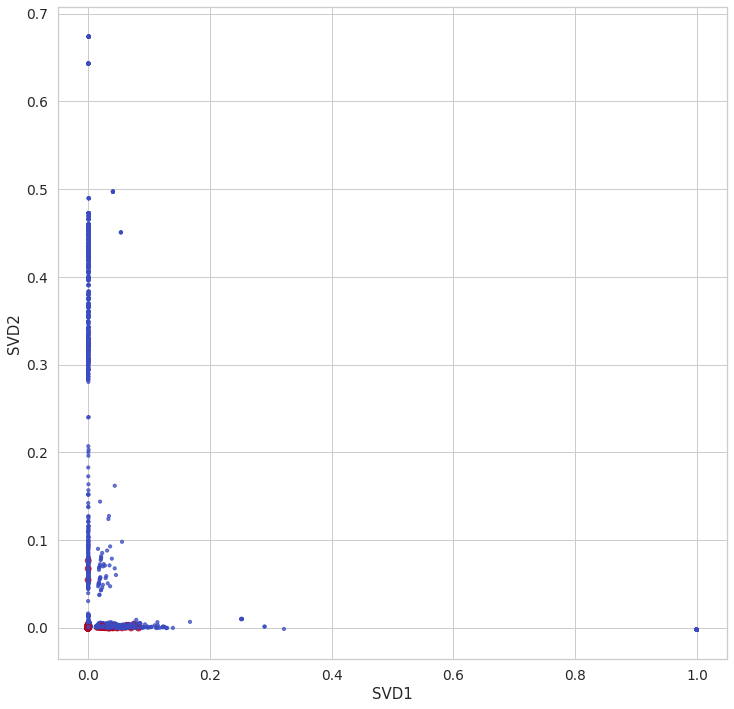

In [64]:
sns.set(style='whitegrid', font_scale=1.25)
plt.figure(figsize=(12,12))
plt.xlabel('SVD1')
plt.ylabel('SVD2')
plt.scatter(X_svd2[:,0], X_svd2[:,1], s=10+25*np.array(df['label']), c=np.array(df['label']), cmap='coolwarm', alpha=0.75);

In [65]:
X_train, X_test, y_train, y_test = tts(X_vectors, np.array(df['label']), 
                                       stratify=df['label'], 
                                       random_state=rnd_st, 
                                       test_size=0.2)

In [35]:
def ShowHeat(y_pred, y_real = y_test):
    sns.set(font_scale=1.25)

    fig = plt.figure(figsize=(5,5))
    nn_mtx = metrics.confusion_matrix(y_real, y_pred)
    #print(nn_mtx)
    font = {'weight' : 'bold', 'size'   :22}
    matplotlib.rc('xtick', labelsize=18) 
    matplotlib.rc('ytick', labelsize=18) 
    sns.heatmap(nn_mtx, annot=True, fmt="d", 
                xticklabels=['ноль (0)', 'один (1)'], 
                yticklabels=['ноль (0)', 'один (1)'],
                cmap='coolwarm', vmin=0, cbar=False)
    #           cmap="rocket")
    plt.ylabel("Real value")
    plt.xlabel("Predicted value")
    plt.show()
    print(metrics.classification_report(y_real, y_pred))

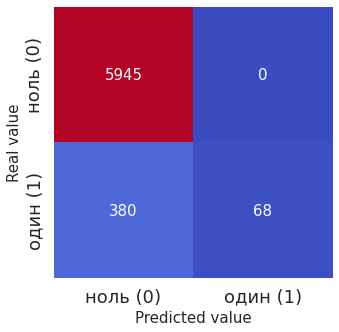

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5945
           1       1.00      0.15      0.26       448

    accuracy                           0.94      6393
   macro avg       0.97      0.58      0.62      6393
weighted avg       0.94      0.94      0.92      6393



In [207]:
logreg = LogisticRegression(max_iter=1000, n_jobs=-1)
logreg.fit(X_train, y_train)
ShowHeat(logreg.predict(X_test))

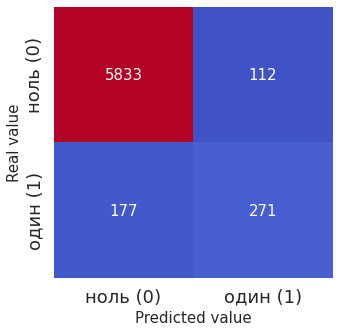

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5945
           1       0.71      0.60      0.65       448

    accuracy                           0.95      6393
   macro avg       0.84      0.79      0.81      6393
weighted avg       0.95      0.95      0.95      6393



In [208]:
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)
logreg.fit(X_train, y_train)
ShowHeat(logreg.predict(X_test))

In [39]:
import xgboost as xgb

In [72]:
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn import pipeline as pl
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks

In [68]:
param_dist = {'objective':'binary:logistic', 
              'n_estimators':250, 
              'eval_metric':'logloss', 
              'early_stopping_rounds':10,
             'scale_pos_weight':1.0}

search_dict = {'scale_pos_weight':[4.0, 5.0, 6.0, 7.0, 8.0]}

clf = xgb.XGBClassifier(**param_dist)


clf_gs = GridSearchCV(clf, search_dict, 
                        cv = 5, 
                        verbose = True,
                        scoring='f1',   
                        n_jobs=-1)

#xgb_pipe = pl.Pipeline([('xgb',clf)])

clf_gs.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

#evals_result = xgb_pipe.evals_result()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=10,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=250, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'scale_pos_weight': [2.0, 6.0, 10.0, 14.0, 18.0]},
             scoring='f1', verbose=True)

In [215]:
clf_gs.best_params_, clf_gs.best_score_.round(2)

({'scale_pos_weight': 6.0}, 0.58)

[[5801  144]
 [ 173  275]]


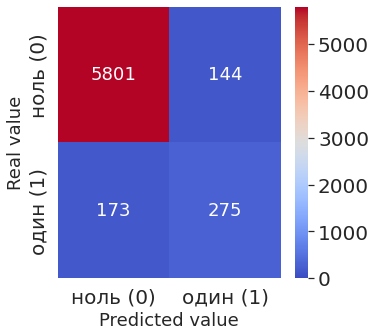

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5945
           1       0.66      0.61      0.63       448

    accuracy                           0.95      6393
   macro avg       0.81      0.79      0.80      6393
weighted avg       0.95      0.95      0.95      6393



In [69]:
ShowHeat(clf_gs.predict(X_test))

## TfidfVectorizer + TruncatedSVD

In [351]:
X_svd100 = TruncatedSVD(n_components=1000).fit_transform(X_vectors)

In [352]:
X_train, X_test, y_train, y_test = tts(X_svd100, np.array(df['label']), 
                                       stratify=df['label'], 
                                       random_state=rnd_st, 
                                       test_size=0.2)

In [388]:
pd.Series(y_train).value_counts()

0    23775
1     1794
dtype: int64

In [389]:
pd.Series(y_test).value_counts()

0    5945
1     448
dtype: int64

In [390]:
X_train.shape

(25569, 1000)

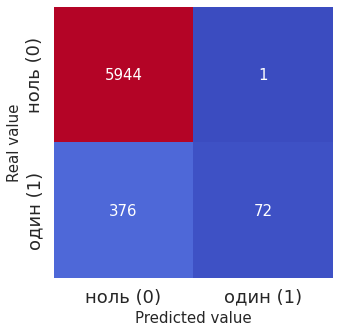

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5945
           1       0.99      0.16      0.28       448

    accuracy                           0.94      6393
   macro avg       0.96      0.58      0.62      6393
weighted avg       0.94      0.94      0.92      6393



In [391]:
logreg = LogisticRegression(max_iter=1000, n_jobs=-1)
logreg.fit(X_train, y_train)
ShowHeat(logreg.predict(X_test))

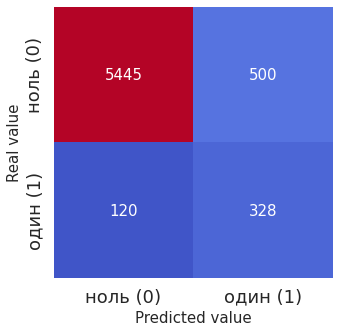

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      5945
           1       0.40      0.73      0.51       448

    accuracy                           0.90      6393
   macro avg       0.69      0.82      0.73      6393
weighted avg       0.94      0.90      0.92      6393



In [392]:
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)
logreg.fit(X_train, y_train)
ShowHeat(logreg.predict(X_test))

In [393]:
param_dist = {'objective':'binary:logistic', 
              'n_estimators':250, 
              'eval_metric':'logloss', 
              'early_stopping_rounds':10,
             'scale_pos_weight':1.0}

search_dict = {'scale_pos_weight':[4.0, 5.0, 6.0, 7.0, 8.0]}

clf = xgb.XGBClassifier(**param_dist)


clf_gs = GridSearchCV(clf, search_dict, 
                        cv = 5, 
                        verbose = True,
                        scoring='f1',   
                        n_jobs=-1)

#xgb_pipe = pl.Pipeline([('xgb',clf)])

clf_gs.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

#evals_result = xgb_pipe.evals_result()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=10,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=250, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'scale_pos_weight': [4.0, 5.0, 6.0, 7.0, 8.0]},
             scoring='f1', verbose=True)

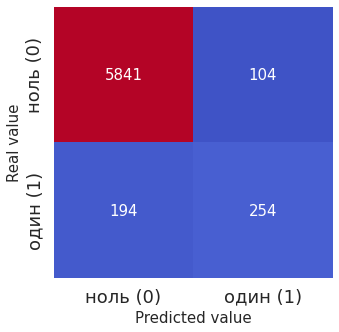

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5945
           1       0.71      0.57      0.63       448

    accuracy                           0.95      6393
   macro avg       0.84      0.77      0.80      6393
weighted avg       0.95      0.95      0.95      6393



In [394]:
ShowHeat(clf_gs.predict(X_test))

In [374]:
%%time

# n_estimators = np.linspace(100, 1000, 10, dtype=int)
# max_features = ['log2', 'sqrt']
# max_depth = np.linspace(1, 15, 15, dtype=int)
# min_samples_split = np.linspace(2, 50, 10, dtype=int)
# min_samples_leaf = np.linspace(2, 50, 10, dtype=int)
# bootstrap = [True, False]
# param_dist = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
   
# rfc_gs = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1), 
#                         param_dist, 
#                         n_iter = 10, 
#                         cv = 5, 
#                         verbose = 0,
#                         scoring='f1_macro',   
#                         n_jobs=-1, 
#                         random_state=rnd_st)

rfc_gs = RandomForestClassifier(class_weight='balanced', n_estimators=1000, n_jobs=-1)
rfc_gs.fit(X_train, y_train)
rfc_pred = rfc_gs.predict(X_test)

CPU times: user 15min 27s, sys: 5.47 s, total: 15min 33s
Wall time: 6min 24s


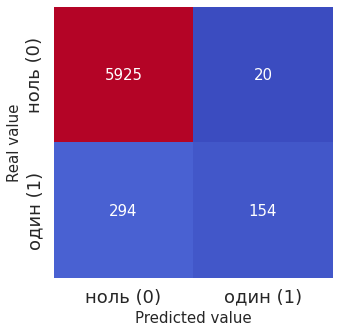

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5945
           1       0.89      0.34      0.50       448

    accuracy                           0.95      6393
   macro avg       0.92      0.67      0.73      6393
weighted avg       0.95      0.95      0.94      6393



In [375]:
ShowHeat(rfc_pred)

In [360]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

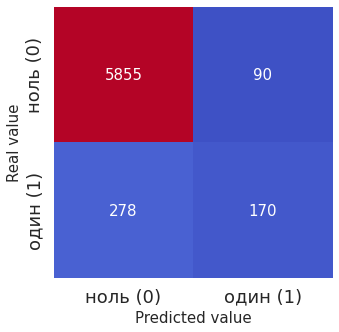

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5945
           1       0.65      0.38      0.48       448

    accuracy                           0.94      6393
   macro avg       0.80      0.68      0.72      6393
weighted avg       0.93      0.94      0.94      6393



In [361]:
ShowHeat(knn_pred)

In [82]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
abc = AdaBoostClassifier(n_estimators=1000)
abc.fit(X_train, y_train)
abc_pred = abc.predict(X_test)

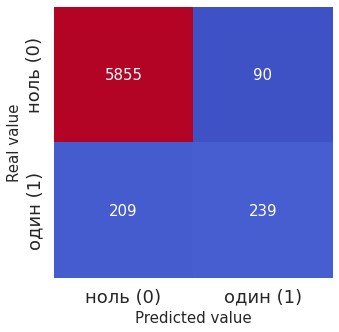

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5945
           1       0.73      0.53      0.62       448

    accuracy                           0.95      6393
   macro avg       0.85      0.76      0.80      6393
weighted avg       0.95      0.95      0.95      6393



In [379]:
ShowHeat(abc_pred)

## naive_bayes

In [529]:
from sklearn.naive_bayes import ComplementNB, MultinomialNB, BernoulliNB, CategoricalNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer

In [530]:
vectorizer = CountVectorizer()

In [531]:
vectorizer.fit(df['tweet'])

CountVectorizer()

In [532]:
len(vectorizer.vocabulary_)

35461

In [533]:
X_vectors = vectorizer.transform(df['tweet'])

In [534]:
X_train, X_test, y_train, y_test = tts(X_vectors, np.array(df['label']), 
                                       stratify=df['label'], 
                                       random_state=rnd_st, 
                                       test_size=0.2)

In [535]:
clf = MultinomialNB().fit(X_train, y_train)

In [536]:
predicts = clf.predict(X_test)

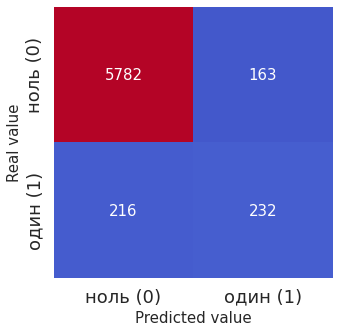

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5945
           1       0.59      0.52      0.55       448

    accuracy                           0.94      6393
   macro avg       0.78      0.75      0.76      6393
weighted avg       0.94      0.94      0.94      6393



In [537]:
ShowHeat(predicts)

In [538]:
# выбрать n лучших (по вероятностям) слов для каждого класса
def show_top(classifier, vectorizer, n, categories=('pos', 'neg')):
    # получаем слова
    feature_names = np.asarray(vectorizer.get_feature_names_out())
    # проходимлся по словам
    for i, category in enumerate(categories):
        # выбираем лучшие по вероятностям
        top = np.argsort(classifier.feature_log_prob_[i])[-n:]
        print("%s: %s" % (category, " | ".join(feature_names[top])))

# отобразим 20 топовых слов
show_top(clf, vectorizer, 20)

pos: bihday | good | positive | thankful | from | like | what | today | time | life | when | will | just | have | your | happy | that | with | this | love
neg: from | women | politics | just | your | allahsoil | people | what | about | have | they | racist | with | libtard | black | like | white | that | this | trump


## naive_bayes + StopWords

In [539]:
vectorizer = CountVectorizer(stop_words=stopWords, ngram_range=(1, 2))

In [540]:
vectorizer.fit(df['tweet'])

CountVectorizer(ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [541]:
len(vectorizer.vocabulary_)

167295

In [542]:
X_vectors = vectorizer.transform(df['tweet'])
X_train, X_test, y_train, y_test = tts(X_vectors, np.array(df['label']), 
                                       stratify=df['label'], 
                                       random_state=rnd_st, 
                                       test_size=0.2)
c_pr = []
for i in np.linspace(1, 1000, 20):
    for j in np.linspace(1, 1000, 20):
        c_pr.append((i,j))
        
grid_mnb = {'class_prior' : c_pr}

mnb_gs = GridSearchCV(MultinomialNB(), grid_mnb, 
                        cv = 5, 
                        verbose = True,
                        scoring='f1',   
                        n_jobs=-1)

mnb_gs.fit(X_train, y_train)
mnb_pred = mnb_gs.predict(X_test)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


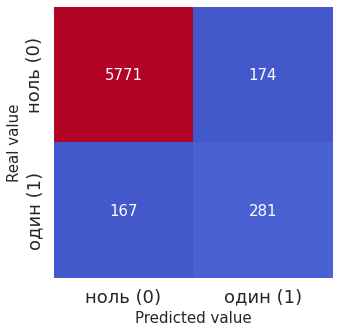

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5945
           1       0.62      0.63      0.62       448

    accuracy                           0.95      6393
   macro avg       0.79      0.80      0.80      6393
weighted avg       0.95      0.95      0.95      6393



In [543]:
ShowHeat(mnb_pred)

In [544]:
mnb_gs.best_params_

{'class_prior': (53.578947368421055, 1.0)}

In [545]:
show_top(MultinomialNB(class_prior=(53.6,1)).fit(X_train, y_train), vectorizer, 20)

pos: make | work | healthy | weekend | want | summer | take | father | smile | people | bihday | good | positive | thankful | like | today | time | life | happy | love
neg: libtard liberal | libtard libtard | might libtard | liberal politics | might | racism | retweet | liberal | hate | obama | women | politics | allahsoil | people | racist | libtard | black | like | white | trump


## Sbert

In [27]:
from transformers import AutoTokenizer, AutoModel
import torch

In [28]:
#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask

In [101]:
df_rest, df_part = tts(df, stratify=df['label'], 
                            random_state=rnd_st, 
                            test_size=0.1)

In [102]:
df_part.shape

(3197, 3)

In [45]:
%%time

#Sentences we want sentence embeddings for
sentences = list(df_part.tweet) #['Привет! Как твои дела?',
             #'А правда, что 42 твое любимое число?']

#Load AutoModel from huggingface model repository
tokenizer = AutoTokenizer.from_pretrained("sberbank-ai/sbert_large_nlu_ru")
model = AutoModel.from_pretrained("sberbank-ai/sbert_large_nlu_ru")

#Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, max_length=24, return_tensors='pt')

#Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

#Perform pooling. In this case, mean pooling
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

CPU times: user 31min 50s, sys: 1min 19s, total: 33min 9s
Wall time: 17min 41s


In [54]:
sentence_embeddings.shape

torch.Size([3197, 1024])

In [55]:
X_train, X_test, y_train, y_test = tts(sentence_embeddings.detach().numpy(), np.array(df_part['label']), 
                                       stratify=df_part['label'], 
                                       random_state=rnd_st, 
                                       test_size=0.2)

In [56]:
X_train.shape

(2557, 1024)

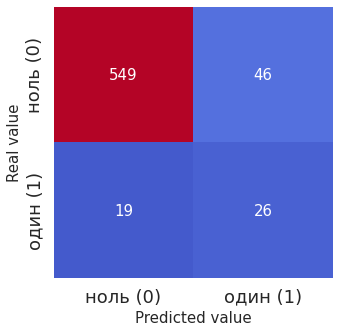

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       595
           1       0.36      0.58      0.44        45

    accuracy                           0.90       640
   macro avg       0.66      0.75      0.69       640
weighted avg       0.92      0.90      0.91       640



In [57]:
ShowHeat(LogisticRegression(class_weight='balanced', max_iter=1000).fit(X_train, y_train).predict(X_test), y_test)

## rubert-tiny

In [26]:
df_part1, df_part2 = tts(df, stratify=df['label'], 
                            random_state=rnd_st, 
                            test_size=0.5)

sentences1 = list(df_part1.tweet)
sentences2 = list(df_part2.tweet)

In [28]:
import torch
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny")
model = AutoModel.from_pretrained("cointegrated/rubert-tiny")
# model.cuda()  # uncomment it if you have a GPU

def embed_bert_cls(text, model, tokenizer):
    t = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**{k: v.to(model.device) for k, v in t.items()})
    embeddings = model_output.last_hidden_state[:, 0, :]
    embeddings = torch.nn.functional.normalize(embeddings)
    return embeddings.detach().numpy()
#     return embeddings.cpu().numpy()

# print(embed_bert_cls(sentences, model, tokenizer).shape)

Some weights of the model checkpoint at cointegrated/rubert-tiny were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [29]:
X_tiny = embed_bert_cls(sentences1, model, tokenizer)

In [30]:
print(X_tiny)

[[-0.00873789 -0.03484156 -0.05850419 ...  0.02913531 -0.02152297
  -0.01944764]
 [-0.02689671 -0.02894564  0.07261372 ...  0.0804102   0.00641188
  -0.05594608]
 [ 0.0200818  -0.01853118 -0.01614705 ... -0.01766275 -0.003423
  -0.07967819]
 ...
 [ 0.03443189  0.01469317  0.07856857 ...  0.07026272  0.03454765
   0.01950479]
 [-0.12974516 -0.08671913  0.03584903 ... -0.00676547  0.01567683
  -0.06355053]
 [-0.03680627 -0.04886734  0.0721175  ...  0.12634017  0.0586217
  -0.04749508]]


In [31]:
X_tiny.shape

(15981, 312)

In [42]:
X_tiny2 = embed_bert_cls(sentences2, model, tokenizer)

In [43]:
X_tiny2.shape

(15981, 312)

In [44]:
X_all = np.vstack((X_tiny, X_tiny2))

In [45]:
X_all.shape

(31962, 312)

In [87]:
y_all = np.vstack((np.array(df_part1.label)[:,np.newaxis], (np.array(df_part2.label)[:,np.newaxis])))

In [88]:
y_all.shape

(31962, 1)

In [89]:
y_all = np.ravel(y_all)

In [90]:
y_all.shape

(31962,)

In [91]:
X_train, X_test, y_train, y_test = tts(X_all, y_all, 
                                       stratify=y_all, 
                                       random_state=rnd_st, 
                                       test_size=0.2)

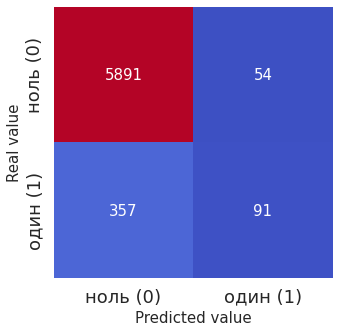

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      5945
           1       0.63      0.20      0.31       448

    accuracy                           0.94      6393
   macro avg       0.79      0.60      0.64      6393
weighted avg       0.92      0.94      0.92      6393



In [95]:
ShowHeat(LogisticRegression(max_iter=1000).fit(X_train, y_train).predict(X_test), y_test)

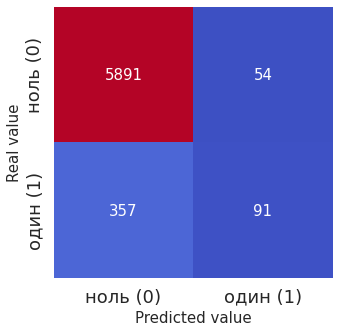

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      5945
           1       0.63      0.20      0.31       448

    accuracy                           0.94      6393
   macro avg       0.79      0.60      0.64      6393
weighted avg       0.92      0.94      0.92      6393



In [98]:
ShowHeat(LogisticRegression(max_iter=1000).fit(X_train, y_train).predict(X_test), y_test)

In [92]:
param_dist = {'objective':'binary:logistic', 
              'n_estimators':250, 
              'eval_metric':'logloss', 
              'early_stopping_rounds':10,
             'scale_pos_weight':6.0}

clf = xgb.XGBClassifier(**param_dist)

clf.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

[0]	validation_0-logloss:0.53838
[1]	validation_0-logloss:0.44562
[2]	validation_0-logloss:0.38396
[3]	validation_0-logloss:0.34342
[4]	validation_0-logloss:0.31171
[5]	validation_0-logloss:0.28879
[6]	validation_0-logloss:0.27133
[7]	validation_0-logloss:0.25807
[8]	validation_0-logloss:0.24604
[9]	validation_0-logloss:0.23807
[10]	validation_0-logloss:0.23162
[11]	validation_0-logloss:0.22634
[12]	validation_0-logloss:0.22127
[13]	validation_0-logloss:0.21780
[14]	validation_0-logloss:0.21462
[15]	validation_0-logloss:0.21047
[16]	validation_0-logloss:0.20711
[17]	validation_0-logloss:0.20524
[18]	validation_0-logloss:0.20361
[19]	validation_0-logloss:0.20186
[20]	validation_0-logloss:0.19779
[21]	validation_0-logloss:0.19681
[22]	validation_0-logloss:0.19545
[23]	validation_0-logloss:0.19400
[24]	validation_0-logloss:0.19205
[25]	validation_0-logloss:0.19109
[26]	validation_0-logloss:0.19017
[27]	validation_0-logloss:0.18950
[28]	validation_0-logloss:0.18779
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

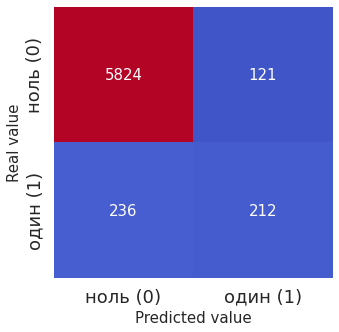

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5945
           1       0.64      0.47      0.54       448

    accuracy                           0.94      6393
   macro avg       0.80      0.73      0.76      6393
weighted avg       0.94      0.94      0.94      6393



In [93]:
ShowHeat(clf.predict(X_test), y_test)

Все исследованные модели справляются с задачей примерно одинаково плохо. Качество зависит больше от предварительной обработки исходных текстовых сообщений (и применения StopWords), чем от способа перевода текста в числовые вектора.

TfIdf(+SVD)+классические модели или CountVectorizer+naive_bayes показывают f1 по первому классу на уровне 62-65%.

Трансформер sbert оказался крайне требовательным к компьютерным ресурсам, кроме того, не понятно подходит ли он для английского языка. Судя про преобразованной части выборки, качество классических моделей построенных на результатах работы sbert практически не отличается от качества моделей упомянутых выше.

Использование более маленького и быстрого трансформера cointegrated/rubert-tiny позволило за короткое время получить векторное представление всех сообщений в датасете. Качество предсказаний при этом ухудшилось.